


```
start program
```

分類器


In [1]:
import pandas as pd
import numpy as np
# from sklearn import svm # 支援向量機
from sklearn.ensemble import RandomForestClassifier  # 隨機森林
from sklearn.ensemble import GradientBoostingClassifier  # GBDT梯度提升決策樹
from sklearn.naive_bayes import GaussianNB # 貝氏 Naive Bayes classifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

2000筆資料(146+1854)

In [3]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F10-2000.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df_data.head()

,CHILD-NUM,MLU-W,MLU-C,MLU5-W,MLU5-C,VOCD-D,VOCD-D-C,CTTR-W,CTTR-C,YN
0,sdv-id-854,3.148591,5.965981,10.921569,18.188204,53.682428,67.080872,4.568611,4.963256,True
1,sdv-id-855,2.836482,3.836953,6.676874,9.389778,57.241162,49.454141,5.491114,4.570931,True
2,sdv-id-856,2.620397,2.956645,6.113724,6.207434,28.162603,34.112033,4.446977,3.522848,True
3,sdv-id-857,3.030627,4.744057,7.180650,10.237542,54.673768,62.480053,5.440459,5.107309,True
4,sdv-id-858,2.466621,3.124289,6.273624,10.162564,54.161742,44.988083,5.171992,4.114772,True


In [5]:
label_map = {False: '0', True: '1'}
df_data['Class'] = df_data['YN'].map(label_map)

In [6]:
df_data

,CHILD-NUM,MLU-W,MLU-C,MLU5-W,MLU5-C,VOCD-D,VOCD-D-C,CTTR-W,CTTR-C,YN,Class
0,sdv-id-854,3.148591,5.965981,10.921569,18.188204,53.682428,67.080872,4.568611,4.963256,True,1
1,sdv-id-855,2.836482,3.836953,6.676874,9.389778,57.241162,49.454141,5.491114,4.570931,True,1
2,sdv-id-856,2.620397,2.956645,6.113724,6.207434,28.162603,34.112033,4.446977,3.522848,True,1
3,sdv-id-857,3.030627,4.744057,7.180650,10.237542,54.673768,62.480053,5.440459,5.107309,True,1
4,sdv-id-858,2.466621,3.124289,6.273624,10.162564,54.161742,44.988083,5.171992,4.114772,True,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,A142,2.657000,3.485000,7.400000,9.400000,26.400000,30.650000,2.994487,3.075774,True,1
1996,A143,2.909000,3.838000,7.000000,7.800000,32.830000,41.950000,4.058769,4.179651,True,1
1997,A144,2.606000,3.296000,5.600000,8.000000,22.540000,29.710000,3.206089,3.559326,True,1
1998,A145,2.171000,2.629000,5.800000,6.800000,12.120000,11.290000,2.433321,2.359071,True,1


In [7]:
X=df_data.drop(labels=['CHILD-NUM','Class','YN'],axis=1).values
y=df_data['Class'].values
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state= 0)

建立 貝氏分類器 Naive Bayes classifier 模型

In [8]:
nbModel = GaussianNB()

建立 Random Forest Classifier 模型

In [9]:
randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')

建立 GBDT梯度提升決策樹 模型

In [10]:
gbdtModel = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

使用訓練資料訓練模型(NB)

In [11]:
nbModel.fit(X_train, y_train)

GaussianNB()

使用訓練資料訓練模型(RF)

In [12]:
randomForestModel.fit(X_train, y_train)

RandomForestClassifier()

使用訓練資料訓練模型(GBDT)

In [13]:
gbdtModel.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

使用測試資料預測分類


In [14]:
nb_predicted = nbModel.predict(X_test)
nb_actual = y_test

In [15]:
rf_predicted = randomForestModel.predict(X_test)
rf_actual = y_test

In [16]:
gbdt_predicted = gbdtModel.predict(X_test)
gbdt_actual = y_test

分類準確度統計 那在判斷準確度方面，我們可以使用一個名為「混淆矩陣」(Confusion matrix)的方式來統計。

混淆矩陣 真陽TP、真陰TN、偽陽FP、偽陰FN

```
TP（True Positive）：有問題的人，並且被模型判出有問題。
TN（True Negative）：沒問題的人，並且被模型判出沒問題。
FP（False Positive）：沒問題的人，但是被模型判成有問題。
FN（False Negative）：有問題的人，但是被模型判成沒問題。
```


In [17]:
# nb
nb_TN, nb_FP, nb_FN, nb_TP = metrics.confusion_matrix(nb_actual, nb_predicted).ravel()
print("nb_TP=" , nb_TP)
print("nb_FN=" , nb_FN)
print("nb_FP=" , nb_FP)
print("nb_TN=" , nb_TN)

nb_TP= 272
nb_FN= 45
nb_FP= 65
nb_TN= 18


In [18]:
# rf
rf_TN, rf_FP, rf_FN, rf_TP = metrics.confusion_matrix(rf_actual, rf_predicted).ravel()
print("rf_TP=" , rf_TP)
print("rf_FN=" , rf_FN)
print("rf_FP=" , rf_FP)
print("rf_TN=" , rf_TN)

rf_TP= 306
rf_FN= 11
rf_FP= 66
rf_TN= 17


In [19]:
# gbdt
gbdt_TN, gbdt_FP, gbdt_FN, gbdt_TP = metrics.confusion_matrix(gbdt_actual, gbdt_predicted).ravel()
print("gbdt_TP=" , gbdt_TP)
print("gbdt_FN=" , gbdt_FN)
print("gbdt_FP=" , gbdt_FP)
print("gbdt_TN=" , gbdt_TN)

gbdt_TP= 307
gbdt_FN= 10
gbdt_FP= 65
gbdt_TN= 18



```
準確度 Accuracy = (TP+TN)/(TP+TN+FP+FN)
精確度 Precision(PPV) = (TP)/(TP+FP)
靈敏度 Sensitivity(Recall) = TP/(TP+FN)
盛行率 Prevalence = (TP+FN)/(TP+TN+FP+FN)
特異度 Specificity = TN/(TN+FP)
F1分數 F1-score = 2/((1/Precision)+(1/Sensitivity))
```




In [20]:
# nb
nb_Accuracy = (nb_TP+nb_TN)/(nb_TP+nb_TN+nb_FP+nb_FN)
print("nb_Accuracy= " , nb_Accuracy)
nb_Precision = (nb_TP)/(nb_TP+nb_FP)
print("nb_Precision= " , nb_Precision)
nb_Sensitivity = nb_TP/(nb_TP+nb_FN)
print("nb_Sensitivity= " ,  nb_Sensitivity)
nb_Prevalence = (nb_TP+nb_FN)/(nb_TP+nb_TN+nb_FP+nb_FN)
print("nb_Prevalence= " , nb_Prevalence)
nb_Specificity = nb_TN/(nb_TN+nb_FP)
print("nb_Specificity= " , nb_Specificity)
nb_F1_score = 2/((1/nb_Precision)+(1/nb_Sensitivity))
print("nb_F1_score= " , nb_F1_score)

nb_Accuracy=  0.725
nb_Precision=  0.8071216617210683
nb_Sensitivity=  0.8580441640378549
nb_Prevalence=  0.7925
nb_Specificity=  0.21686746987951808
nb_F1_score=  0.8318042813455658


In [21]:
# rf
rf_Accuracy = (rf_TP+rf_TN)/(rf_TP+rf_TN+rf_FP+rf_FN)
print("rf_Accuracy= " , rf_Accuracy)
rf_Precision = (rf_TP)/(rf_TP+rf_FP)
print("rf_Precision= " , rf_Precision)
rf_Sensitivity = rf_TP/(rf_TP+rf_FN)
print("rf_Sensitivity= " , rf_Sensitivity)
rf_Prevalence = (rf_TP+rf_FN)/(rf_TP+rf_TN+rf_FP+rf_FN)
print("rf_Prevalence= " , rf_Prevalence)
rf_Specificity = rf_TN/(rf_TN+rf_FP)
print("rf_Specificity= " , rf_Specificity)
rf_F1_score = 2/((1/rf_Precision)+(1/rf_Sensitivity))
print("rf_F1_score= " , rf_F1_score)


rf_Accuracy=  0.8075
rf_Precision=  0.8225806451612904
rf_Sensitivity=  0.9652996845425867
rf_Prevalence=  0.7925
rf_Specificity=  0.20481927710843373
rf_F1_score=  0.888243831640058


In [22]:
# gbdt
gbdt_Accuracy = (gbdt_TP+gbdt_TN)/(gbdt_TP+gbdt_TN+gbdt_FP+gbdt_FN)
print("gbdt_Accuracy= " , gbdt_Accuracy)
gbdt_Precision = (gbdt_TP)/(gbdt_TP+gbdt_FP)
print("gbdt_Precision= " , gbdt_Precision)
gbdt_Sensitivity = gbdt_TP/(gbdt_TP+gbdt_FN)
print("gbdt_Sensitivity= " ,  gbdt_Sensitivity)
gbdt_Prevalence = (gbdt_TP+gbdt_FN)/(gbdt_TP+gbdt_TN+gbdt_FP+gbdt_FN)
print("gbdt_Prevalence= " , gbdt_Prevalence)
gbdt_Specificity = gbdt_TN/(gbdt_TN+gbdt_FP)
print("gbdt_Specificity= " , gbdt_Specificity)
gbdt_F1_score = 2/((1/gbdt_Precision)+(1/gbdt_Sensitivity))
print("gbdt_F1_score= " , gbdt_F1_score)


gbdt_Accuracy=  0.8125
gbdt_Precision=  0.8252688172043011
gbdt_Sensitivity=  0.9684542586750788
gbdt_Prevalence=  0.7925
gbdt_Specificity=  0.21686746987951808
gbdt_F1_score=  0.891146589259797


---------------------------------------------------



```
ROC（Receiver operating characteristic curve）
AUC (area under the ROC curve)

```





```
AUC = 1  時，為最理想的情況，分類器做完美的預測。
AUC > 0.5 時，分類器效果比隨機猜測（盲猜）的結果還理想，預測有效果。
AUC = 0.5 時，分類器預測效果與隨機猜測相同，分類器沒有價值。
AUC < 0.5 時，預測效果比盲猜還要差。# 此內容會顯示為程式碼
```



In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

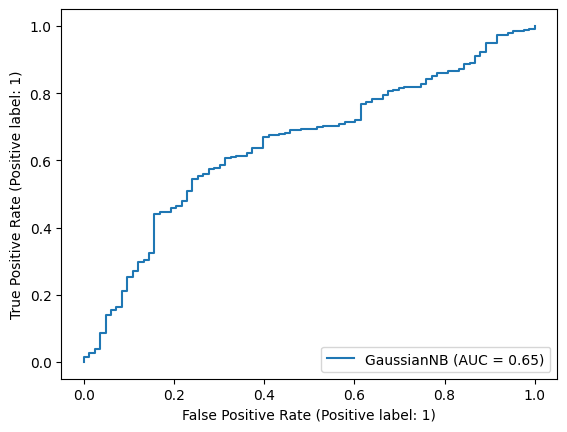

In [24]:
nb_disp = RocCurveDisplay.from_estimator(nbModel, X_test, y_test)
plt.show()

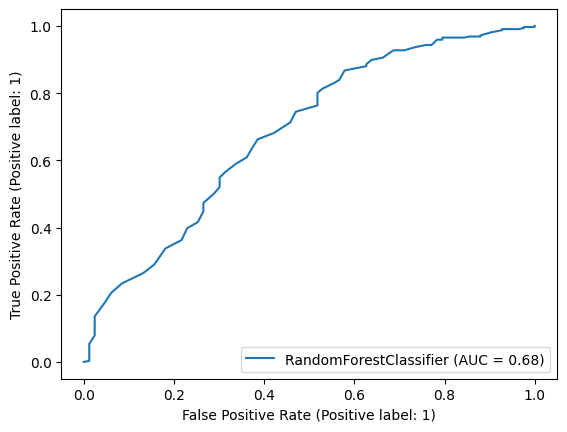

In [25]:
rf_disp = RocCurveDisplay.from_estimator(randomForestModel, X_test, y_test)
plt.show()


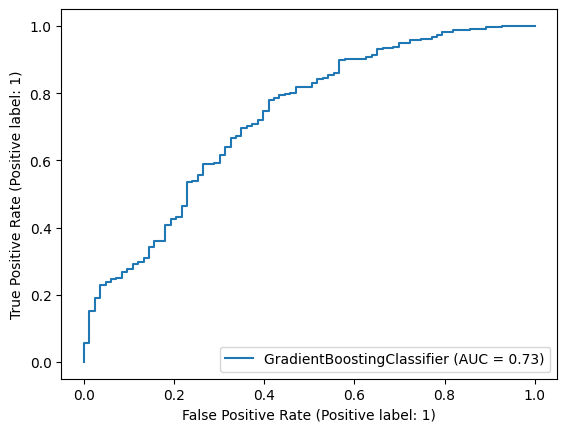

In [26]:
gbdt_disp = RocCurveDisplay.from_estimator(gbdtModel, X_test, y_test)
plt.show()

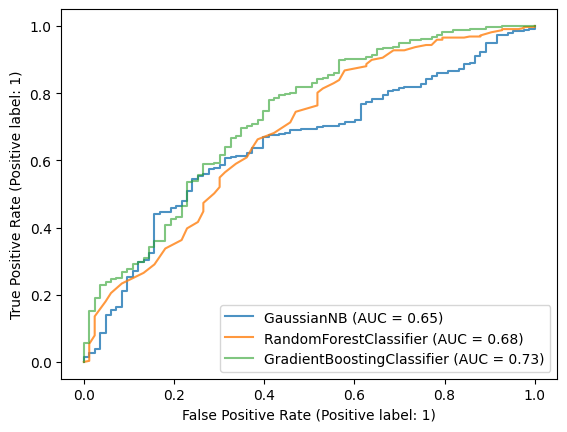

In [27]:
ax = plt.gca()
nb_disp = RocCurveDisplay.from_estimator(nbModel, X_test, y_test, ax=ax, alpha=0.8)
rf_disp.plot(ax=ax, alpha=0.8)
gbdt_disp.plot(ax=ax, alpha=0.6)
plt.show()


混合矩陣


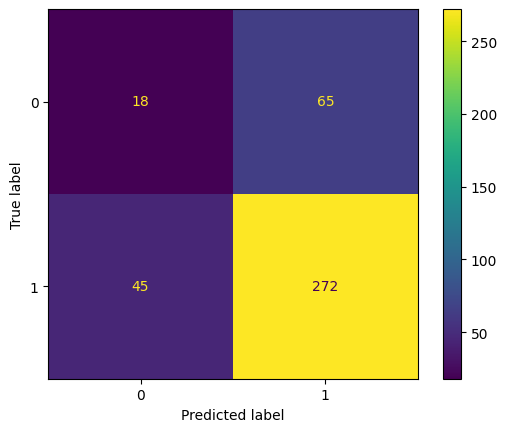

In [28]:
nb_disp_matrix = ConfusionMatrixDisplay.from_estimator(nbModel, X_test, y_test)
plt.show()


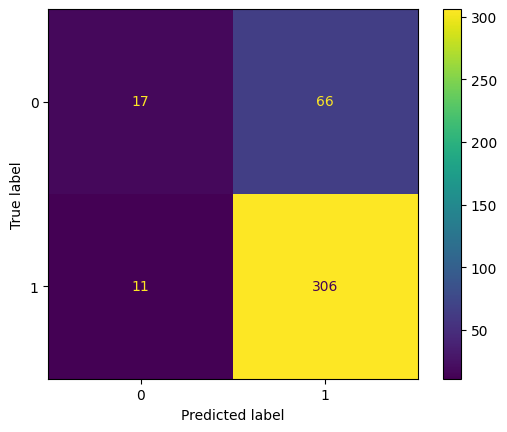

In [29]:
rf_disp_matrix = ConfusionMatrixDisplay.from_estimator(randomForestModel, X_test, y_test)
plt.show()

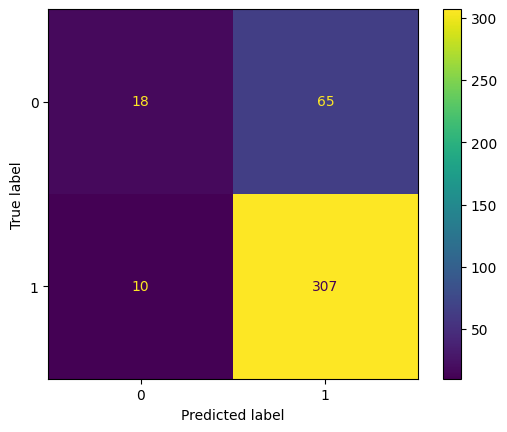

In [30]:
gbdt_disp_matrix = ConfusionMatrixDisplay.from_estimator(gbdtModel, X_test, y_test)
plt.show()

end program